In [1]:
# !pip install remotezip tqdm opencv-python einops
import tqdm
import random
import pathlib
import itertools
import collections

import cv2
# import einops 
import numpy as np
# import remotezip as rz
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras import layers

In [2]:
 # Libraries 
%autosave 5
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
from tensorflow.keras.utils import load_img, img_to_array,array_to_img
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
from keras.applications.imagenet_utils import preprocess_input

import keras
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout, Flatten,GRU,Input
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D,TimeDistributed,MaxPool2D,AveragePooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from keras.applications import ResNet50,VGG16
from keras.models import Model



Autosaving every 5 seconds


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data Tensors

In [4]:
x_train = np.load('/content/drive/MyDrive/tensors_files/x_train_1-tensor.npy', allow_pickle=True)
x_valid = np.load('/content/drive/MyDrive/tensors_files/x_valid_1-tensor.npy', allow_pickle=True)
y_train = np.load('/content/drive/MyDrive/tensors_files/y_train_1-tensor.npy', allow_pickle=True)
y_valid = np.load('/content/drive/MyDrive/tensors_files/y_valid_1-tensor.npy', allow_pickle=True)

In [17]:
x_train.shape

(900, 9, 128, 128, 3)

In [18]:
x_valid.shape

(300, 9, 128, 128, 3)

In [19]:
x_test.shape

(299, 9, 128, 128, 3)

In [5]:
model = Sequential()
# input, with 64 convolutions for 9 images
# that have (128, 128, 3) shape
model.add(
    TimeDistributed(
        Conv2D(64, (3,3), 
            padding='same', strides=(2,2), activation='relu')
        ,input_shape = (9, 128, 128, 3)
    )
)
model.add(Dropout(0.5))

model.add(
    TimeDistributed( 
        Conv2D(64, (3,3), 
            padding='same', strides=(2,2), activation='relu')
    )
)
model.add(Dropout(0.5))

model.add(
    TimeDistributed(
        MaxPooling2D((2,2), strides=(2,2))
    )
)
# Second conv, 128
model.add(
    TimeDistributed(
        Conv2D(128, (3,3),
            padding='same', strides=(2,2), activation='relu')
    )
)
model.add(Dropout(0.5))

model.add(
    TimeDistributed( 
        Conv2D(128, (3,3),
            padding='same', strides=(2,2), activation='relu')
    )
)
model.add(
    TimeDistributed(
        MaxPooling2D((2,2), strides=(2,2))
    )
)
model.add(Flatten())
model.add(Dense(10, activation='softmax'))


In [6]:
model.compile('adam', loss= 'categorical_crossentropy',metrics='accuracy')

In [7]:
history1=model.fit(x_train,y_train,epochs=69,validation_data=(x_valid,y_valid))

Epoch 1/69
29/29 [==============================] - 126s 4s/step - loss: 2.3191 - accuracy: 0.1222 - val_loss: 2.2897 - val_accuracy: 0.1600
Epoch 2/69
29/29 [==============================] - 120s 4s/step - loss: 2.2673 - accuracy: 0.1533 - val_loss: 2.2641 - val_accuracy: 0.1633
Epoch 3/69
29/29 [==============================] - 115s 4s/step - loss: 2.2322 - accuracy: 0.1744 - val_loss: 2.1949 - val_accuracy: 0.2300
Epoch 4/69
29/29 [==============================] - 120s 4s/step - loss: 2.1372 - accuracy: 0.2156 - val_loss: 2.1658 - val_accuracy: 0.2200
Epoch 5/69
29/29 [==============================] - 113s 4s/step - loss: 2.0886 - accuracy: 0.2422 - val_loss: 2.1277 - val_accuracy: 0.2667
Epoch 6/69
29/29 [==============================] - 122s 4s/step - loss: 2.0075 - accuracy: 0.2778 - val_loss: 2.0427 - val_accuracy: 0.3600
Epoch 7/69
29/29 [==============================] - 115s 4s/step - loss: 1.8913 - accuracy: 0.3433 - val_loss: 1.9509 - val_accuracy: 0.3867
Epoch 8/69
29

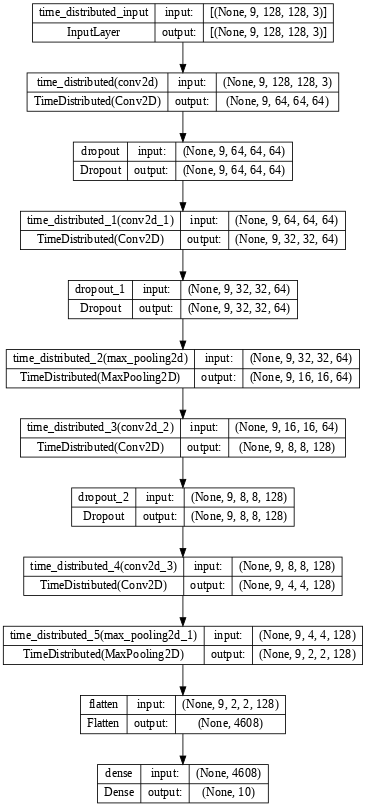

In [8]:
keras.utils.plot_model(model, expand_nested=True, dpi=60, show_shapes=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


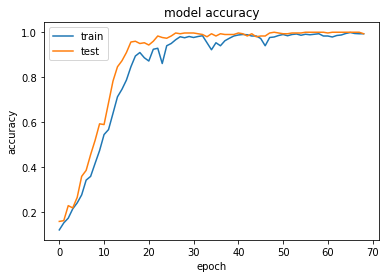

In [10]:
model.save('/content/drive/MyDrive/action_Model.h5')
print(history1.history.keys())
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
plt.savefig('/content/drive/MyDrive/action_Model.png')

<Figure size 432x288 with 0 Axes>

In [12]:
model.save_weights('/content/drive/MyDrive/weights_action_Model.h5')

In [13]:
model = tf.keras.models.load_model('/content/drive/MyDrive/action_Model.h5')

## load test data

In [14]:
x_test = np.load('/content/drive/MyDrive/tensors_files/x_test_1-tensor.npy', allow_pickle=True)
y_test = np.load('/content/drive/MyDrive/tensors_files/y_test_1-tensor.npy', allow_pickle=True)

In [15]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=64)
print("test loss, test acc:", results)


Evaluate on test data
5/5 [==============================] - 11s 1s/step - loss: 5.3034 - accuracy: 0.2274
test loss, test acc: [5.303417205810547, 0.227424755692482]


In [16]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)

Generate predictions for 3 samples
1/1 [==============================] - 0s 258ms/step
predictions shape: (3, 10)
